(1797, 64) (1797,)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]
[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]
[[ 1.91421366 -0.95450157 -3.94603482 ... -0.01797902  0.04795038
   0.01912424]
 [ 0.58898033  0.9246358   3.92475494 ... -1.14415907  0.03774402
   0.37167996]
 [ 1.30203906 -0.31718883  3.02333293 ...  0.48730406 -1.35695937
  -0.10701564]
 ...
 [ 1.02259599 -0.14791087  2.4699736

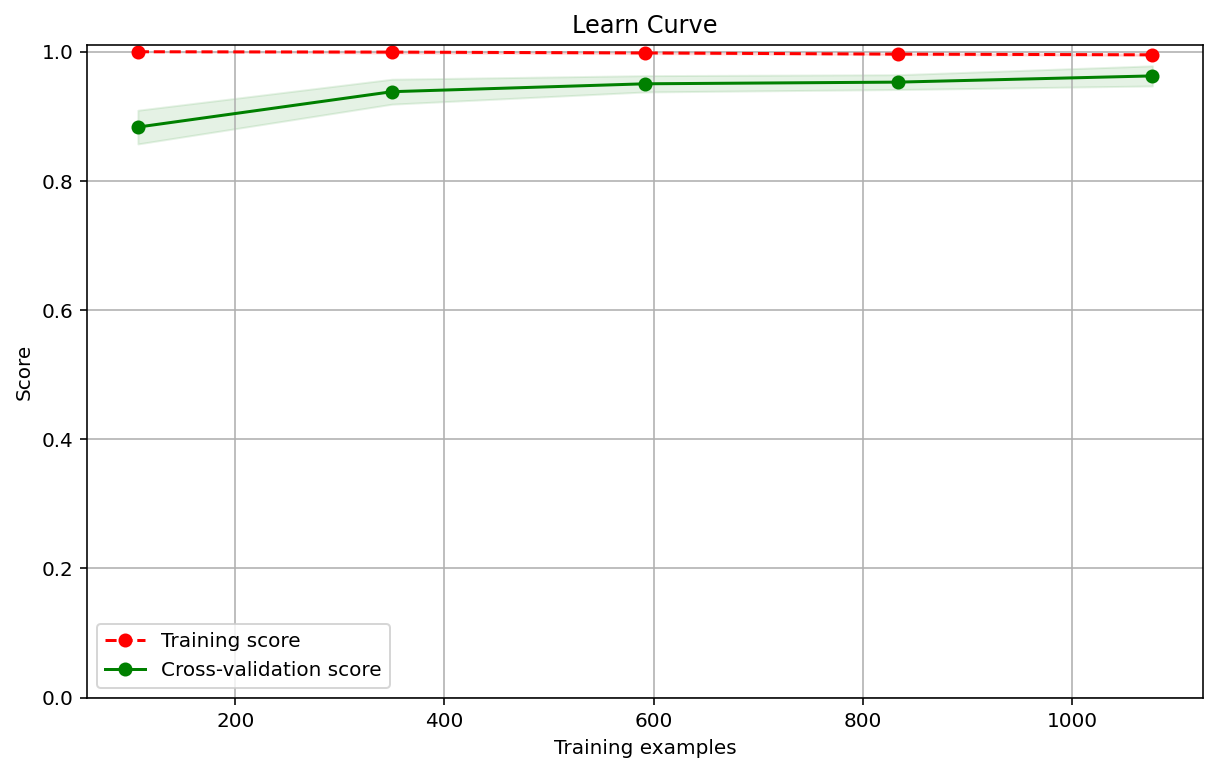

[[51  0  1  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  2  2]
 [ 0  0 50  1  0  0  0  0  0  0]
 [ 0  0  2 36  0  0  0  0  1  1]
 [ 0  0  0  0 50  0  0  0  0  1]
 [ 0  0  0  0  0 50  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  1  0  0 43  0  0]
 [ 0  0  2  0  0  0  1  1 34  1]
 [ 0  1  0  1  0  2  0  0  2 29]]


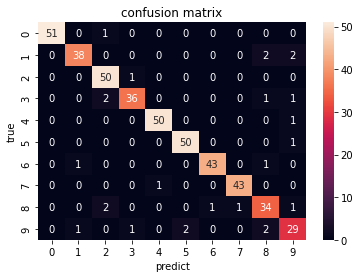

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.95      0.90      0.93        42
           2       0.91      0.98      0.94        51
           3       0.95      0.90      0.92        40
           4       0.98      0.98      0.98        51
           5       0.96      0.98      0.97        51
           6       0.98      0.96      0.97        45
           7       0.98      0.98      0.98        44
           8       0.85      0.87      0.86        39
           9       0.83      0.83      0.83        35

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



In [1]:
from common.utils import plot_learning_curve
import seaborn as sn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

digits = load_digits()
X = digits.data
y = digits.target


def show(image):
    test = image.reshape((8, 8))  # 从一维变为二维，这样才能被显示
    print(test.shape)  # 查看是否是二维数组
    # print(test)
    plt.imshow(test, cmap=plt.cm.gray)  # 显示灰色图像
    plt.show()


def standard_demo(data):
    transfer = StandardScaler()
    data_new = transfer.fit_transform(data)
    print(data_new)
    return data_new


def pca_demo(data):
    transfer = PCA(n_components=0.92)
    data_new = transfer.fit_transform(data)
    print(data_new)
    return data_new


def Logistic_demo(data, label):
    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=6)
    # 训练模型
    estimate = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)  # 可以选择多分类方法 ovr 和 multinomial
    estimate.fit(X_train, y_train)  # 模型构建好了
    # 模型评估的两种方法：1：直接比对预测值与真实值；
    y_predict = estimate.predict(X_test)
    print("直接比对预测值与真实值：\n", y_test == y_predict)
    # 2：计算准确率
    score = estimate.score(X_test, y_test)
    print("准确率为：\n", score)
    # 绘制学习曲线!!!!
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)  # 10折交叉验证
    fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=144)
    plot_learning_curve(ax, estimate, "Learn Curve",
                        X_train, y_train, ylim=(0.0, 1.01), cv=cv)
    plt.show()
    # 混淆矩阵
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    # 可视化显示混淆矩阵
    # annot = True 显示数字 ，fmt参数不使用科学计数法进行显示
    ax = sn.heatmap(cm, annot=True, fmt='.20g')
    ax.set_title('confusion matrix')  # 标题
    ax.set_xlabel('predict')  # x轴
    ax.set_ylabel('true')  # y轴
    plt.show()
    # 计算精确率与召回率
    report = classification_report(y_test, y_predict, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                                   target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
    print(report)


# 按间距中的绿色按钮以运行脚本。
if __name__ == '__main__':
    # 查看数据集，以图片显示
    print(X.shape, y.shape)
    print(X, y)
    # show(X[1795])
    # 数据集预处理（标准化、特征降维）
    X_new = standard_demo(X)
    X_new = pca_demo(X_new)
    print(X_new.shape)  # 从64维降到了40维
    # 机器学习建模
    # 调参
    # 模型评估
    # 学习曲线
    Logistic_demo(X_new, y)  # 数据已经准备好了
